In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df = pd.read_csv('/home/jerome/Documents/CSV FILE/students_dropout_academic_success.csv')

In [53]:
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.isna().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

/tmp/ipykernel_5618/3958966986.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="target", palette="Set2")


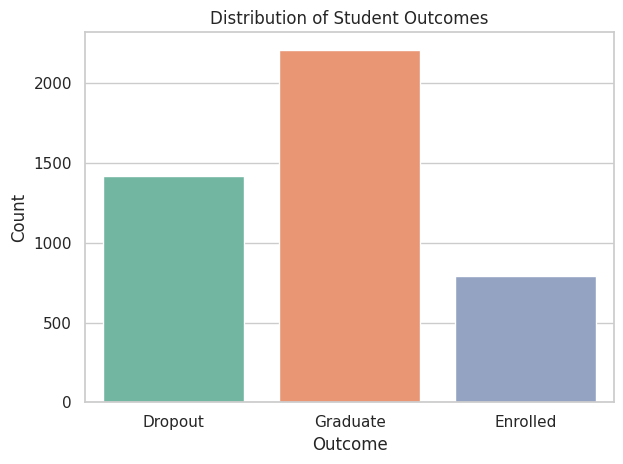

In [56]:
sns.countplot(data=df, x="target", palette="Set2")
plt.title("Distribution of Student Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

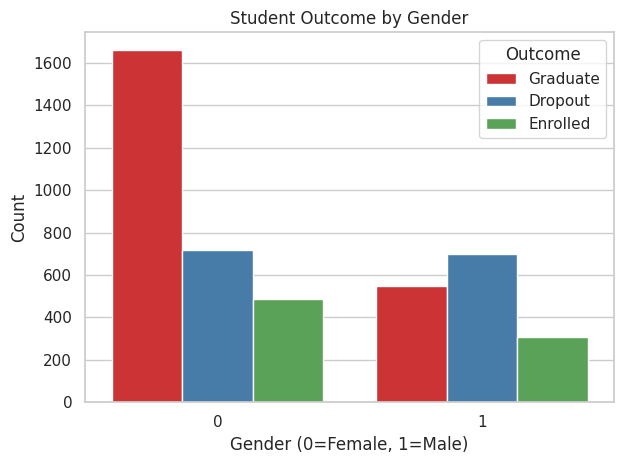

In [57]:
sns.countplot(data=df, x="Gender", hue="target", palette="Set1")
plt.title("Student Outcome by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Count")
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()

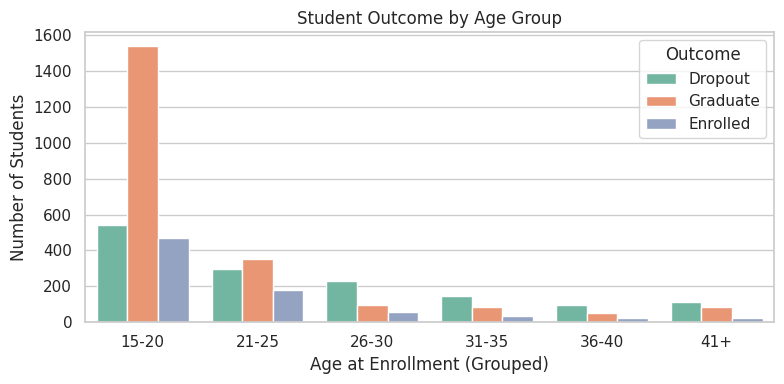

In [58]:
age_bins = [14, 20, 25, 30, 35, 40, 100]
age_labels = ["15-20", "21-25", "26-30", "31-35", "36-40", "41+"]

df["Age Group"] = pd.cut(df["Age at enrollment"], bins=age_bins, labels=age_labels)

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Age Group", hue="target", palette="Set2")
plt.title("Student Outcome by Age Group")
plt.xlabel("Age at Enrollment (Grouped)")
plt.ylabel("Number of Students")
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()

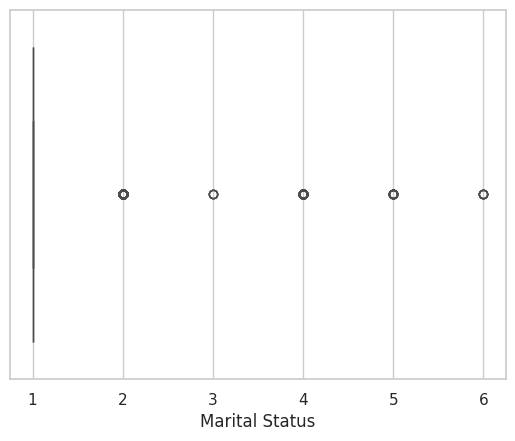

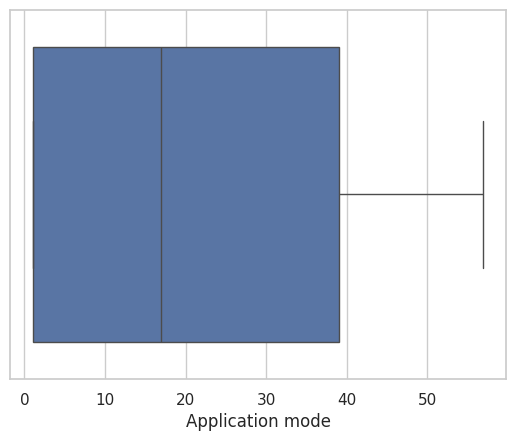

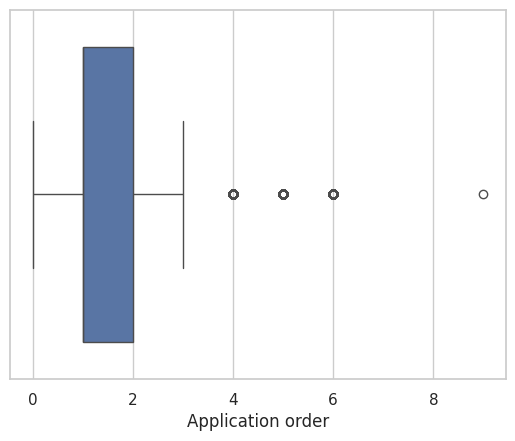

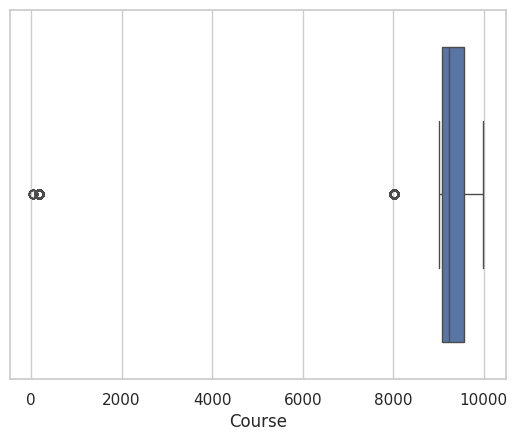

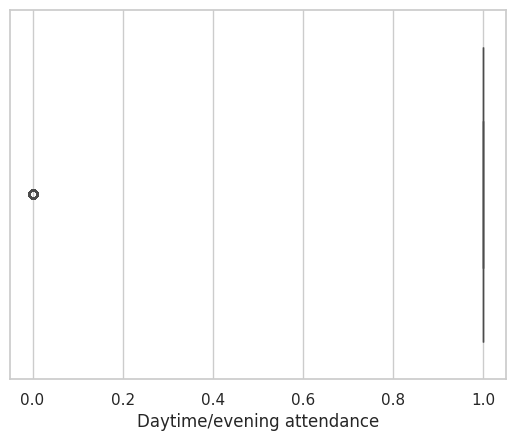

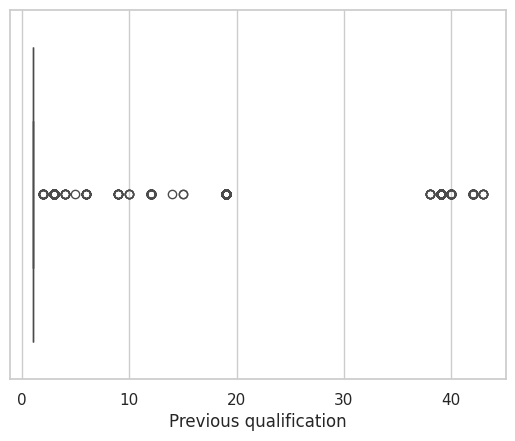

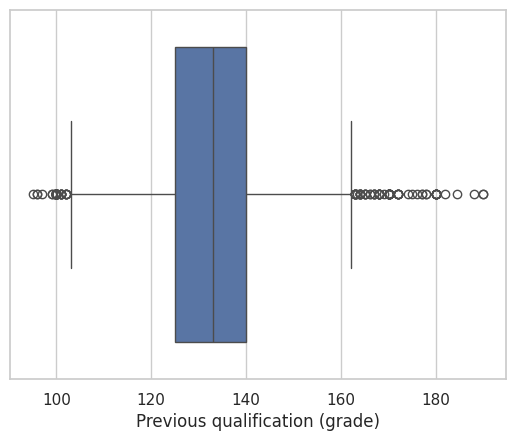

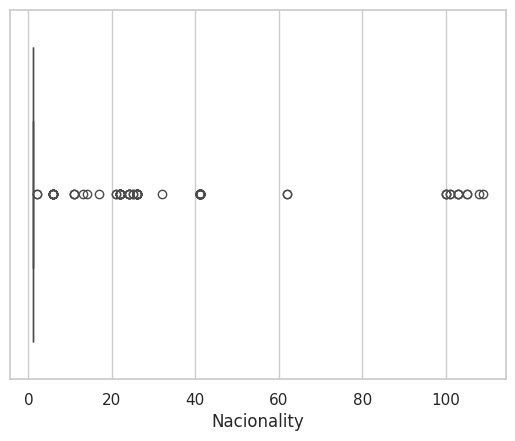

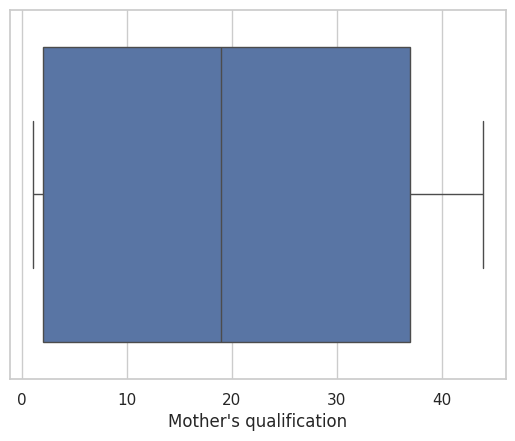

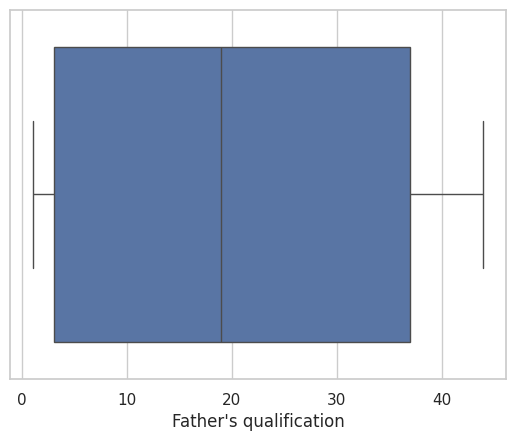

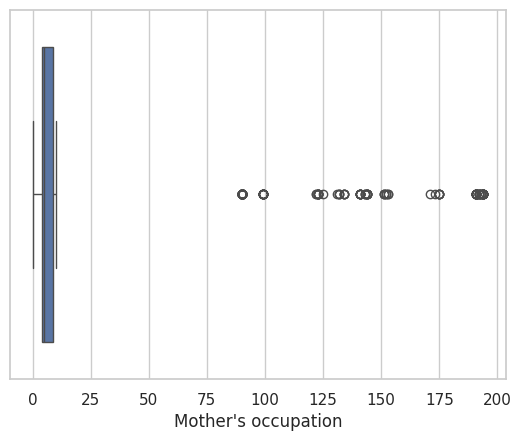

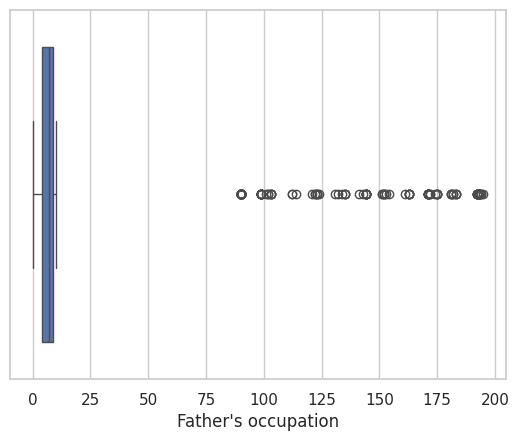

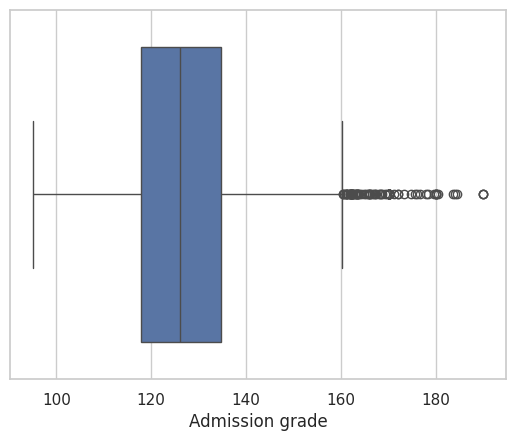

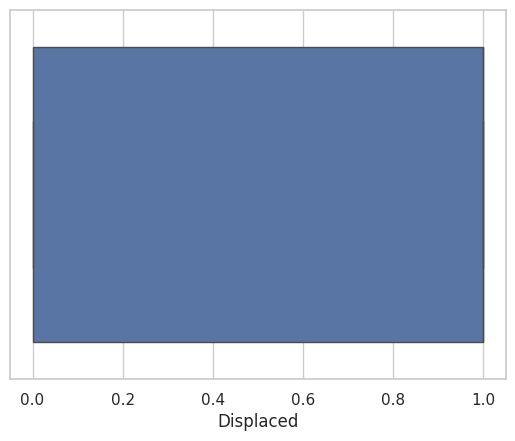

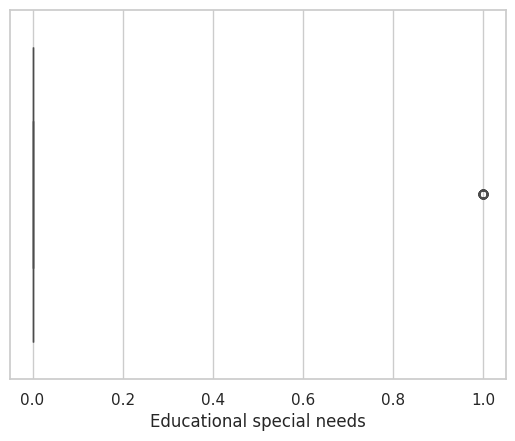

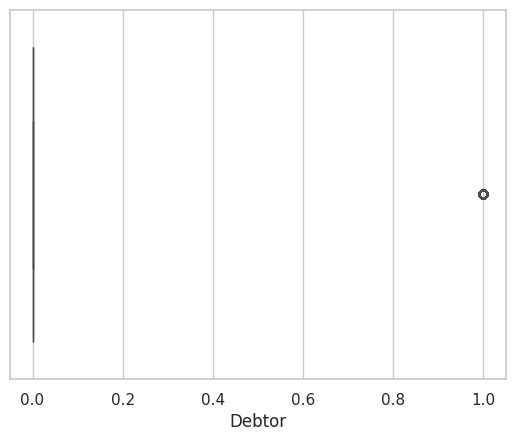

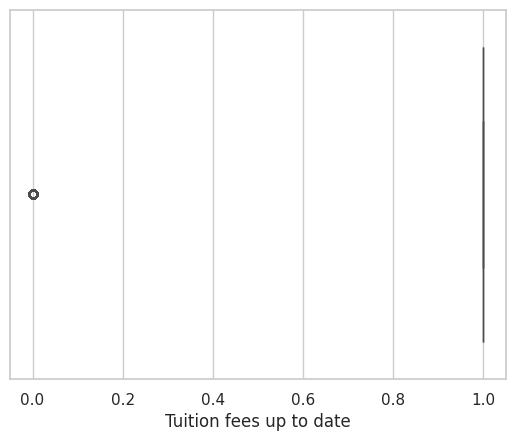

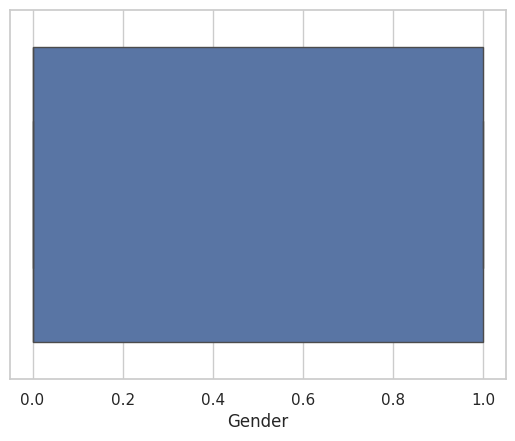

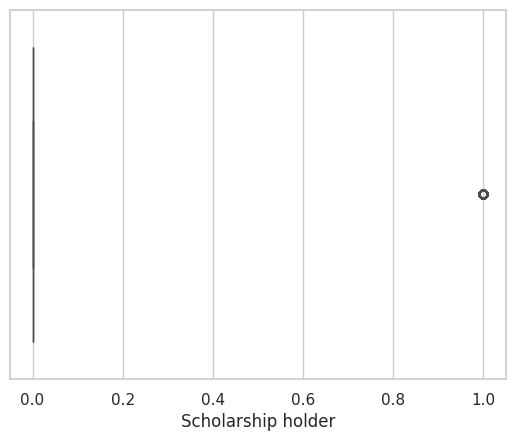

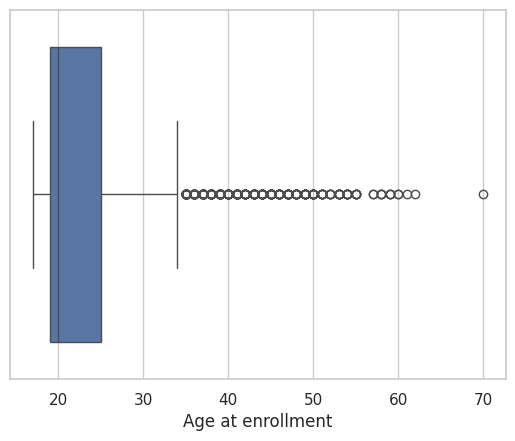

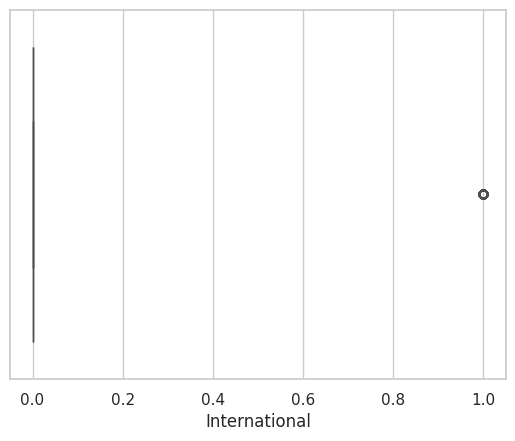

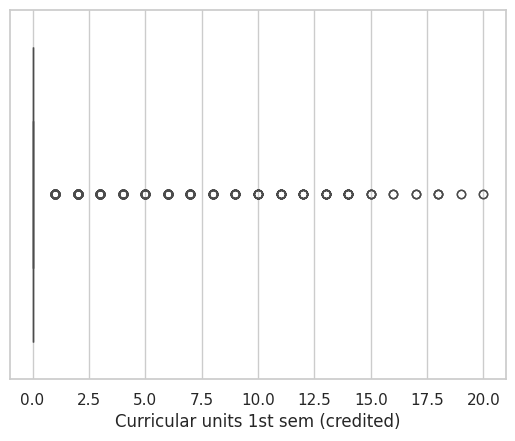

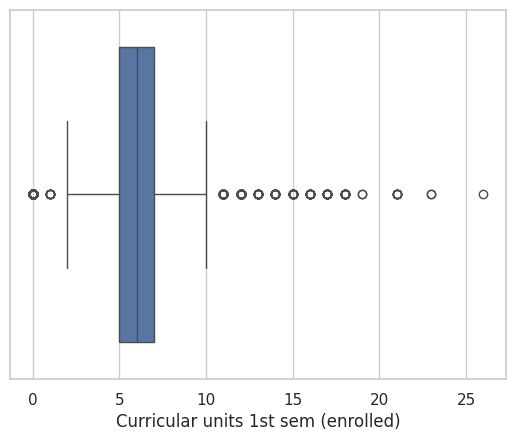

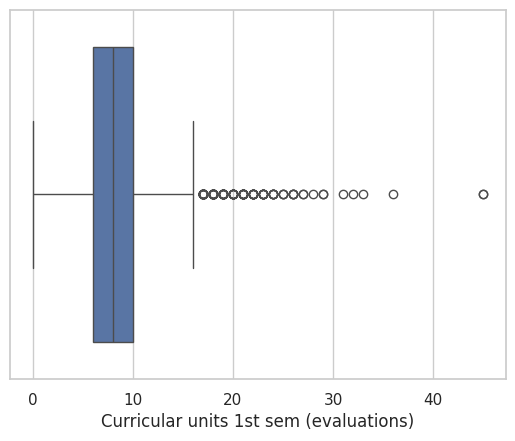

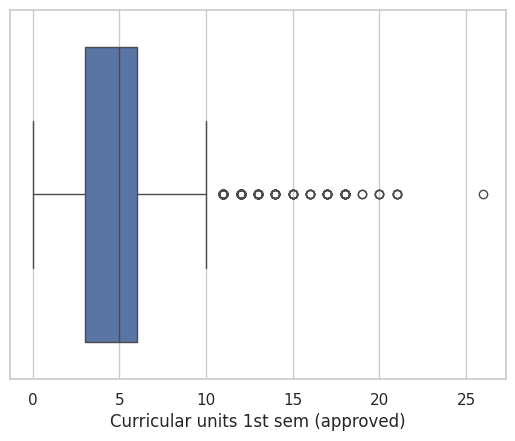

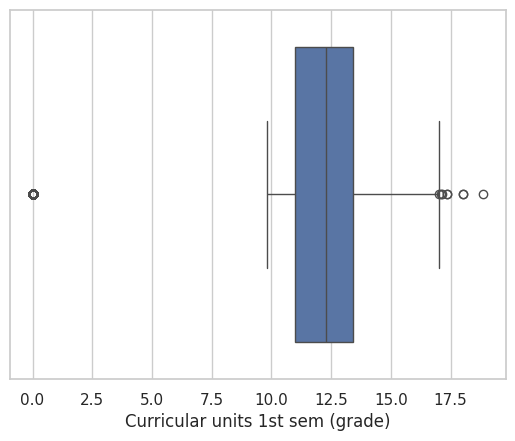

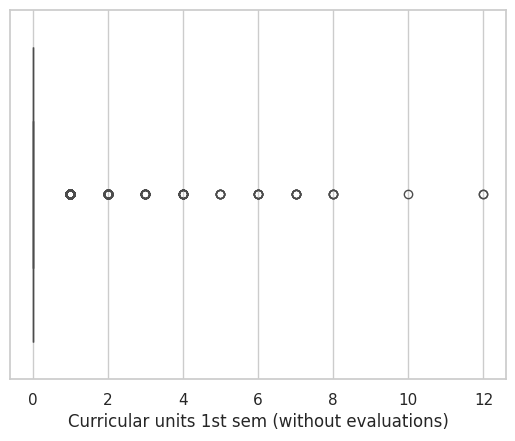

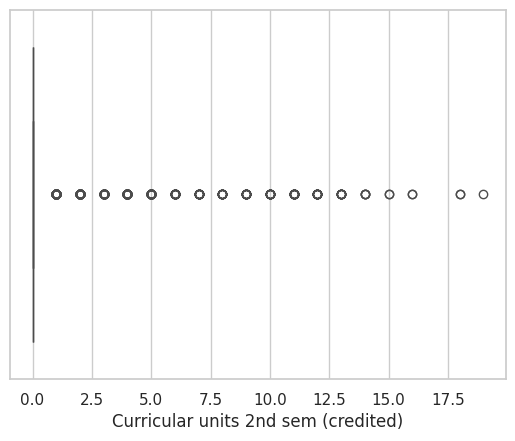

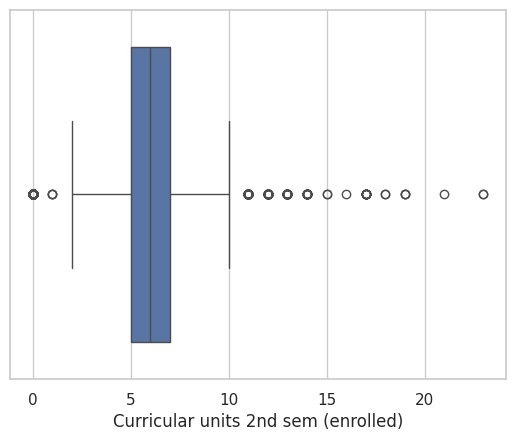

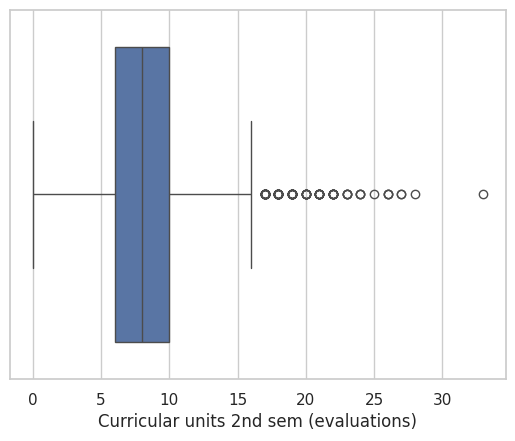

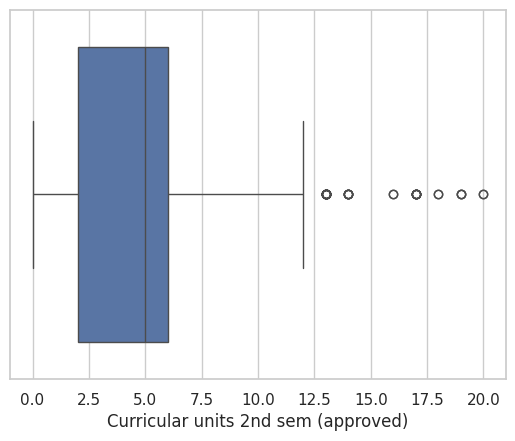

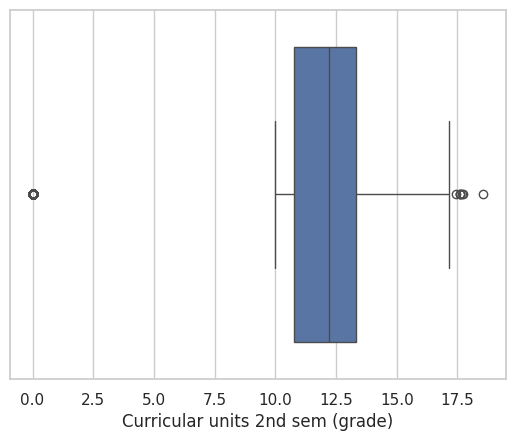

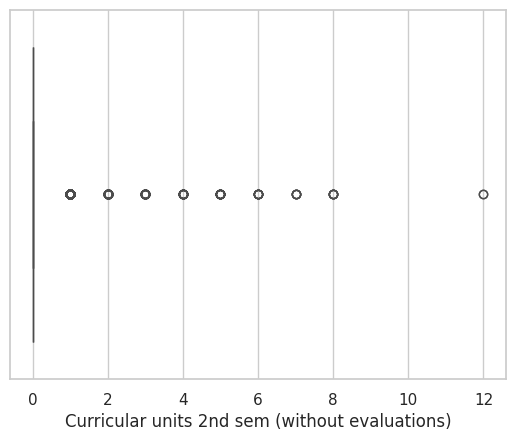

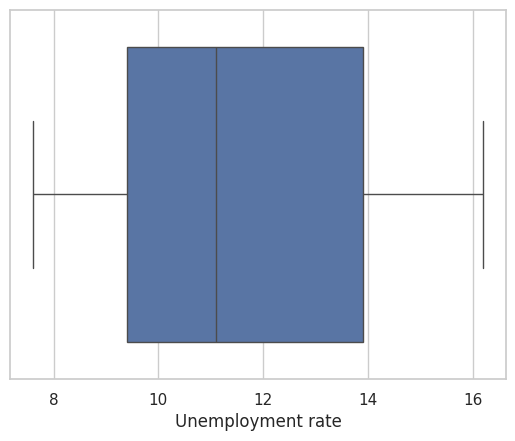

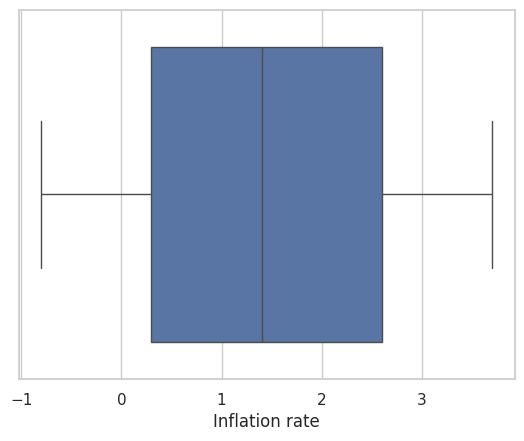

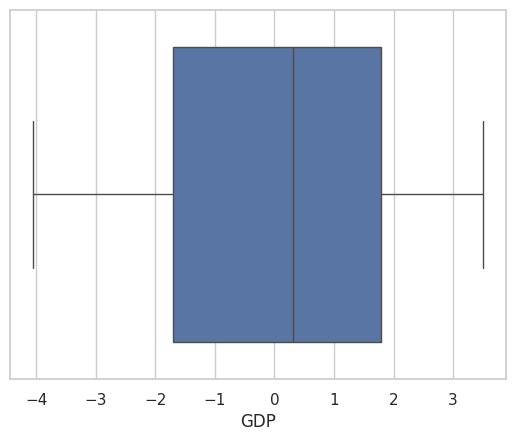

In [59]:
num =df.select_dtypes("number")
for x in num.columns:
    sns.boxplot(x = num[x])
    plt.show()

**CLASSIFICATION**

In [60]:
df.drop("Age Group", axis= 1, inplace= True)

In [61]:
df['target'] = df['target'].map({'Dropout':0, 'Graduate':1, 'Enrolled': 2})

In [62]:
X = df.drop("target", axis=1)
y = df["target"]

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=20)
X_rfe = rfe.fit_transform(X_scaled, y)


In [70]:
selected_features = X.columns[rfe.support_]
selected_features

Index(['Course', 'Nacionality', 'Mother's qualification',
       'Mother's occupation', 'Debtor', 'Tuition fees up to date',
       'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate'],
      dtype='object')

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.metrics import accuracy_score, classification_report
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.7096045197740113
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       316
           1       0.72      0.91      0.80       418
           2       0.43      0.25      0.31       151

    accuracy                           0.71       885
   macro avg       0.64      0.61      0.61       885
weighted avg       0.69      0.71      0.69       885



/home/jerome/Documents/python_workspace/myenv/share/jupyter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy: 0.6757062146892655
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       316
           1       0.77      0.80      0.78       418
           2       0.34      0.39      0.36       151

    accuracy                           0.68       885
   macro avg       0.62      0.61      0.61       885
weighted avg       0.69      0.68      0.68       885



In [77]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Accuracy: 0.7694915254237288
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       316
           1       0.77      0.93      0.84       418
           2       0.52      0.31      0.39       151

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885



In [78]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.47231638418079097
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       316
           1       0.47      1.00      0.64       418
           2       0.00      0.00      0.00       151

    accuracy                           0.47       885
   macro avg       0.16      0.33      0.21       885
weighted avg       0.22      0.47      0.30       885



/home/jerome/Documents/python_workspace/myenv/share/jupyter/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jerome/Documents/python_workspace/myenv/share/jupyter/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jerome/Documents/python_workspace/myenv/share/jupyter/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div